# Imports

In [1]:
import mne
import numpy as np
import os
import braindecode
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import json

# Functions

In [6]:
def plot_data(model_path='./models/', model_names=['clean'], cell='valid_misclass', ylabel="Accuracy [%]", title='Validation accuracy'):
    models = {}
    for name in model_names:
        json_in = open(f'{model_path}{name}/history', "rb")
        models[name] = json.load(json_in)

    plt.figure(figsize=(16,10))
    for name in model_names:
        plt.plot(models[name][cell], label=f'{name} {cell}')
    plt.legend()
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel(ylabel)
    plt.show()
    
def plot_all(models):
    plot_data(model_names=models , cell = 'val_accuracy', ylabel="Accuracy [%]", title='Validation accuracy')
    plot_data(model_names=models , cell = 'accuracy', ylabel="Accuracy [%]", title='Training accuracy')
    plot_data(model_names=models , cell = 'val_loss', ylabel="Loss", title='Validation loss')
    plot_data(model_names=models , cell = 'loss', ylabel="Loss", title='Training loss')
    
    
def plot_data_folds(model_path='./models/', model_names=['clean'], cell='valid_misclass', ylabel="Accuracy [%]", title='Validation accuracy', folds_num=5, epochs=50):
    models = {}
    for fold in range(0, folds_num):
        for name in model_names:
            json_in = open(f'{model_path}{name}/folds/fold_{fold}/history', "rb")
            data = json.load(json_in)
            if fold == 0:
                models[name] = {}
            for key in data.keys():
                if fold == 0:
                    models[name][key] = np.zeros([folds_num,epochs])
                models[name][key][fold] = data[key]
            
    plt.figure(figsize=(16,10))
    for name in model_names:
        means = np.mean(models[name][cell], axis=0)
        std = np.std(models[name][cell])
        ci = 1.96 * std/(folds_num**0.5) #sprawdzic na brainie
        plt.plot(np.linspace(0,epochs), means, label=f'{name} {cell}')
        plt.fill_between(np.linspace(0,epochs), means-ci, means+ci, alpha=0.3)
    plt.legend()
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel(ylabel)
    plt.show()
    
def plot_all_folds(models):
    plot_data_folds(model_names=models , cell = 'val_accuracy', ylabel="Accuracy [%]", title='Validation accuracy')
    plot_data_folds(model_names=models , cell = 'accuracy', ylabel="Accuracy [%]", title='Training accuracy')
    plot_data_folds(model_names=models , cell = 'val_loss', ylabel="Loss", title='Validation loss')
    plot_data_folds(model_names=models , cell = 'loss', ylabel="Loss", title='Training loss')


Dorysowac wartosc oczekiwana

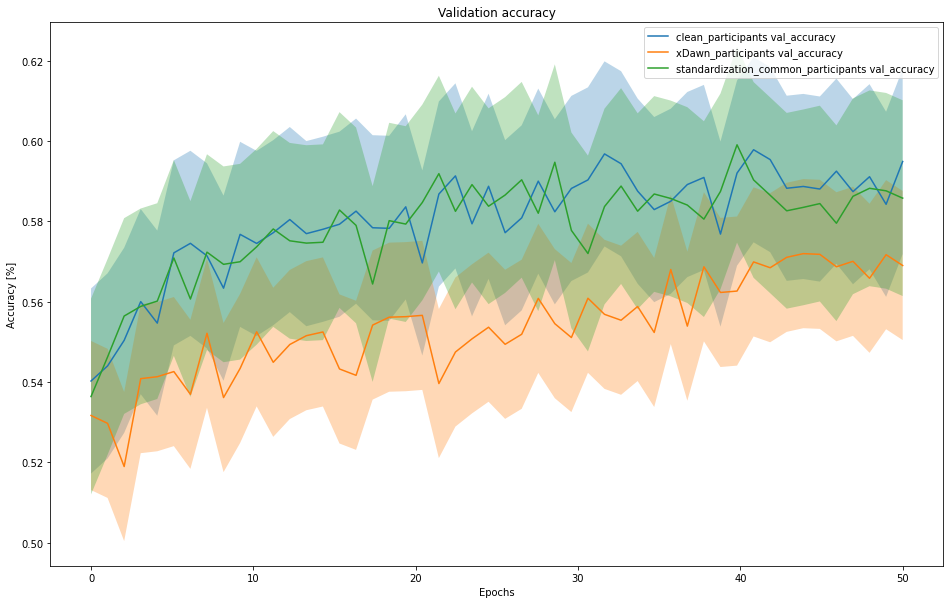

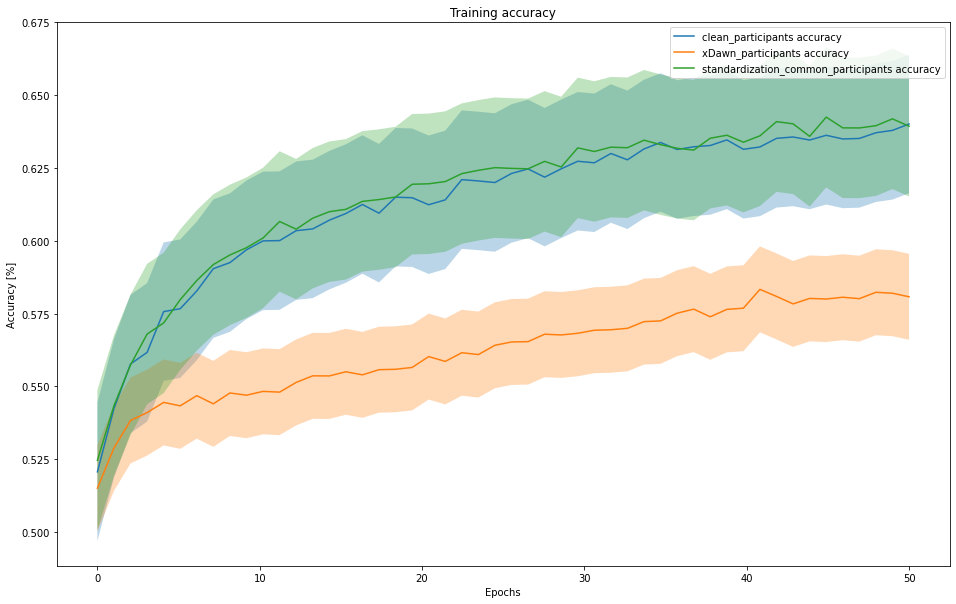

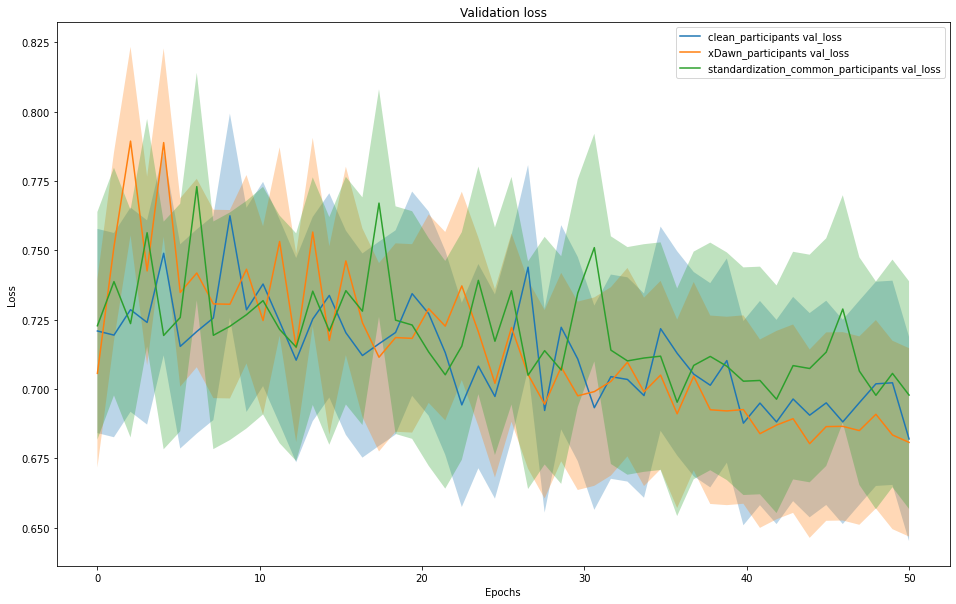

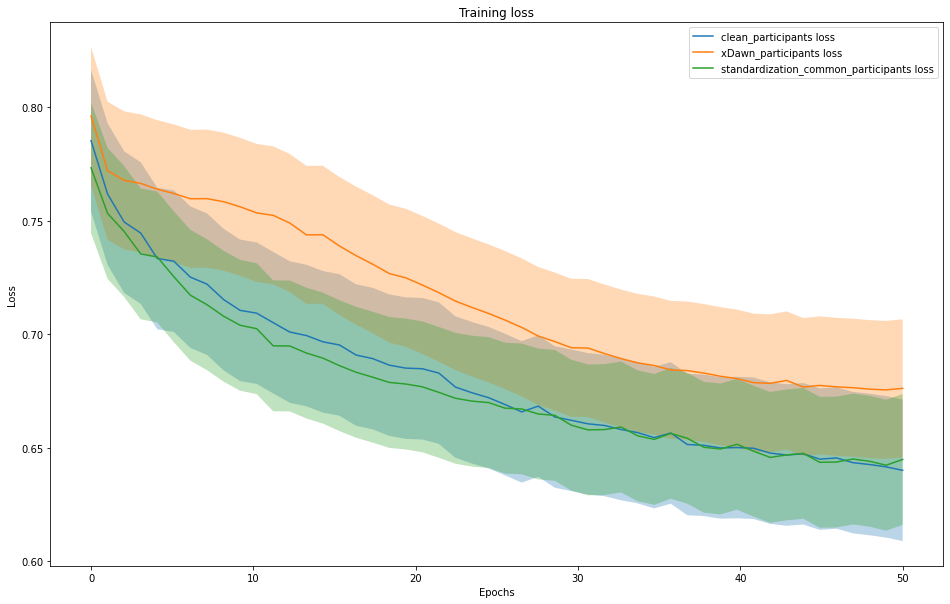

In [7]:
models = ['clean_participants', 'xDawn_participants', 'standardization_common_participants']
plot_all_folds(models)

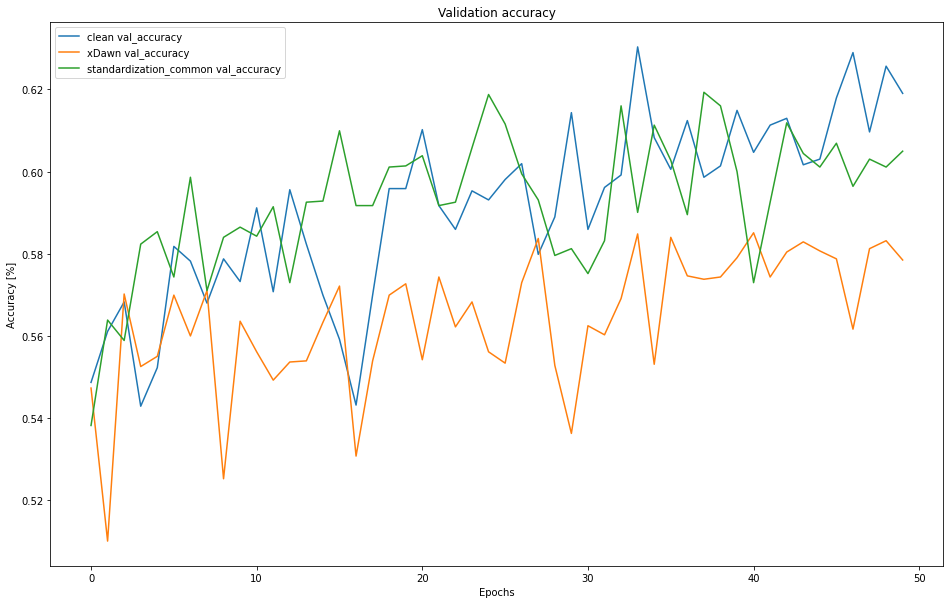

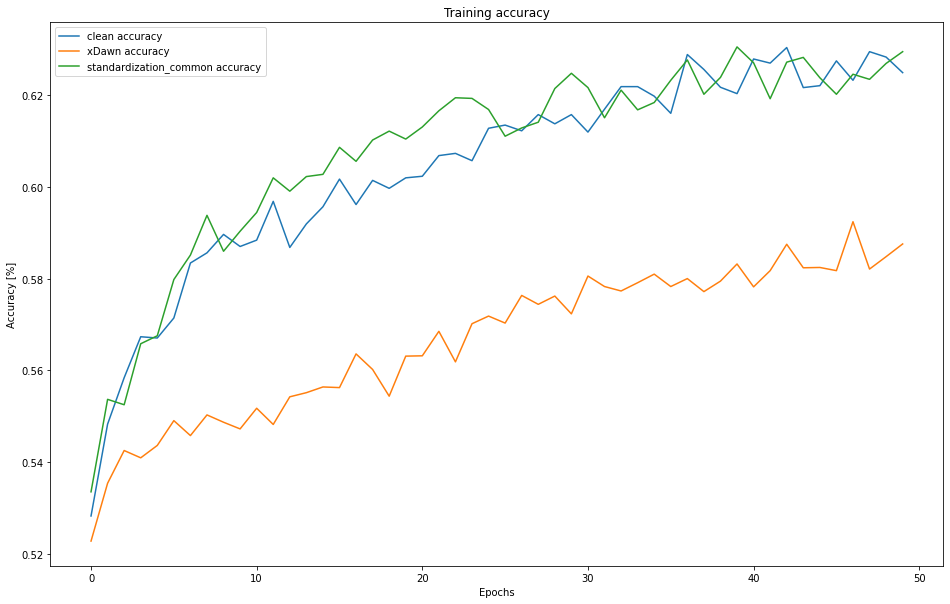

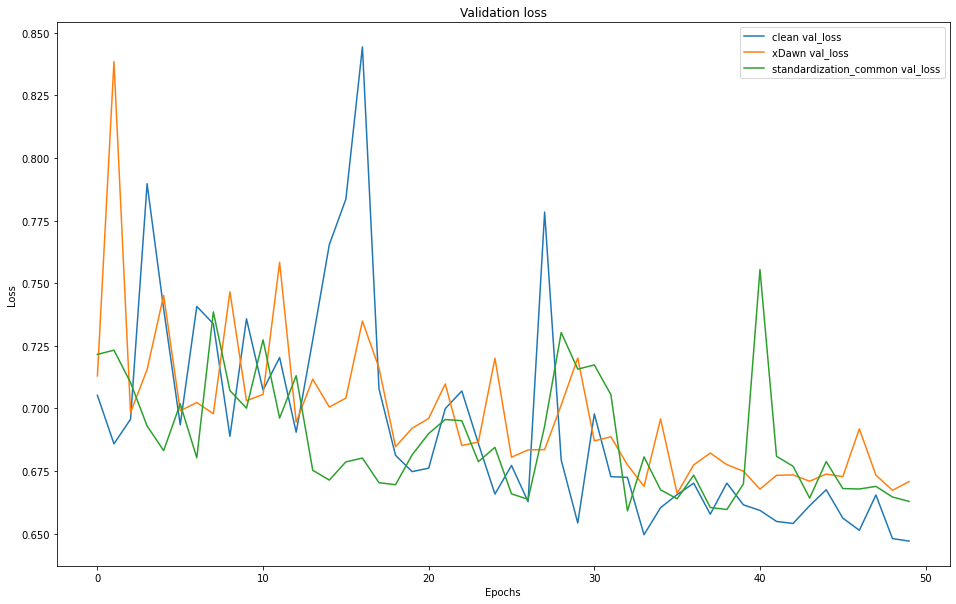

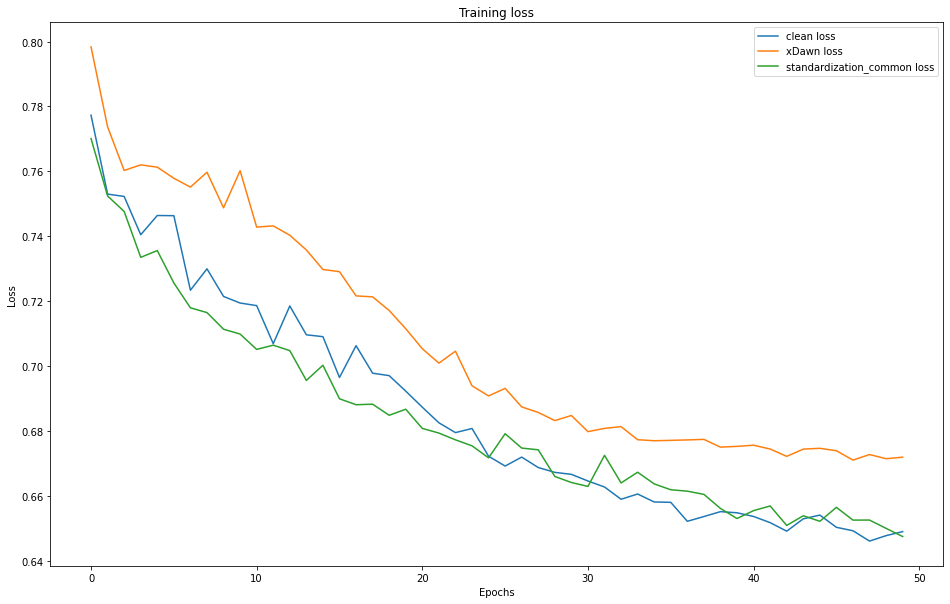

In [5]:
models_1 = ['clean', 'xDawn', 'standardization_common']
plot_all(models_1)

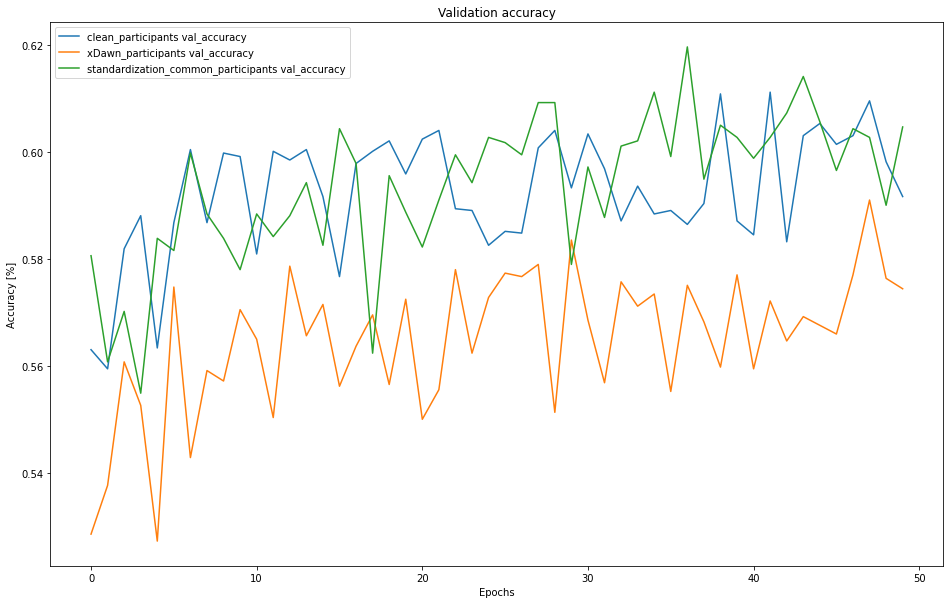

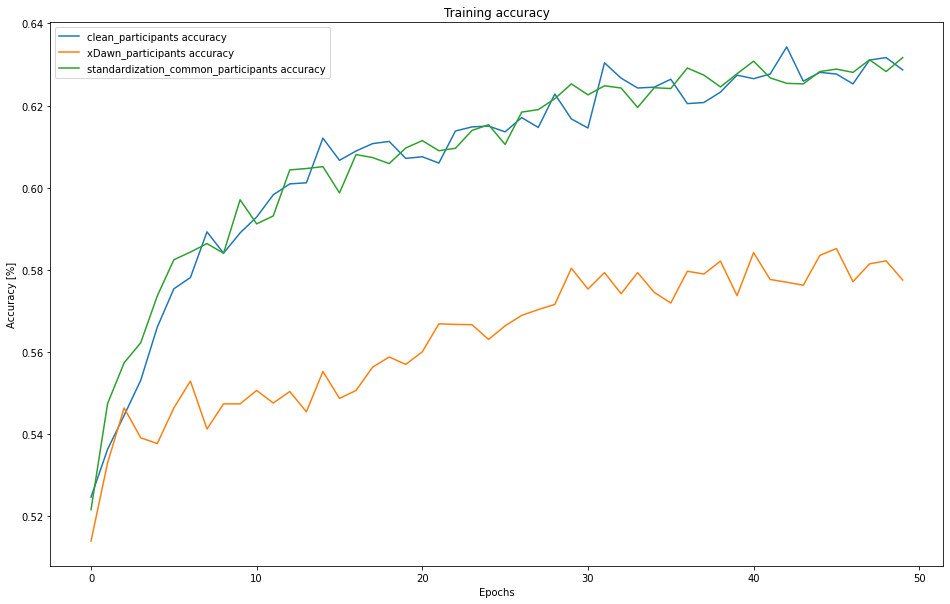

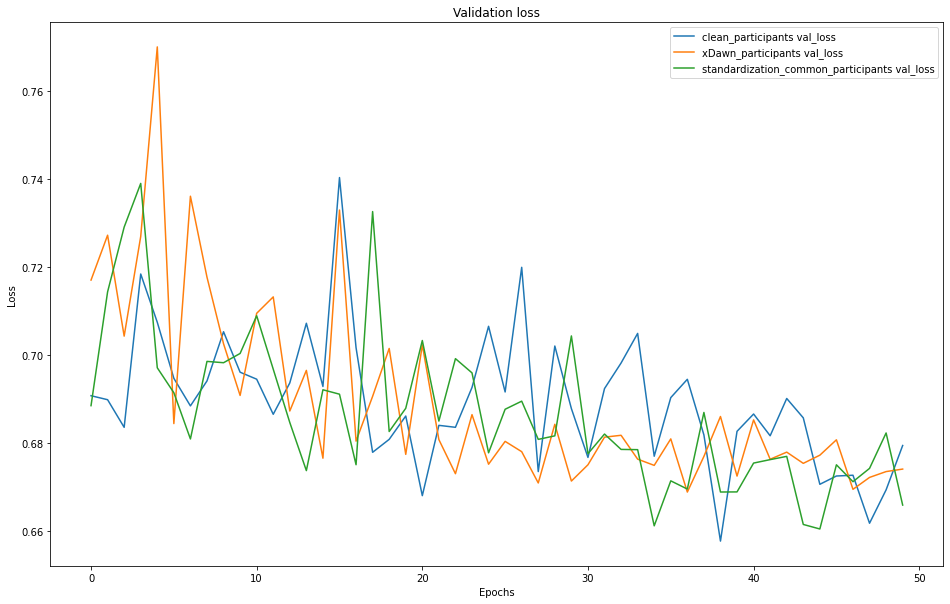

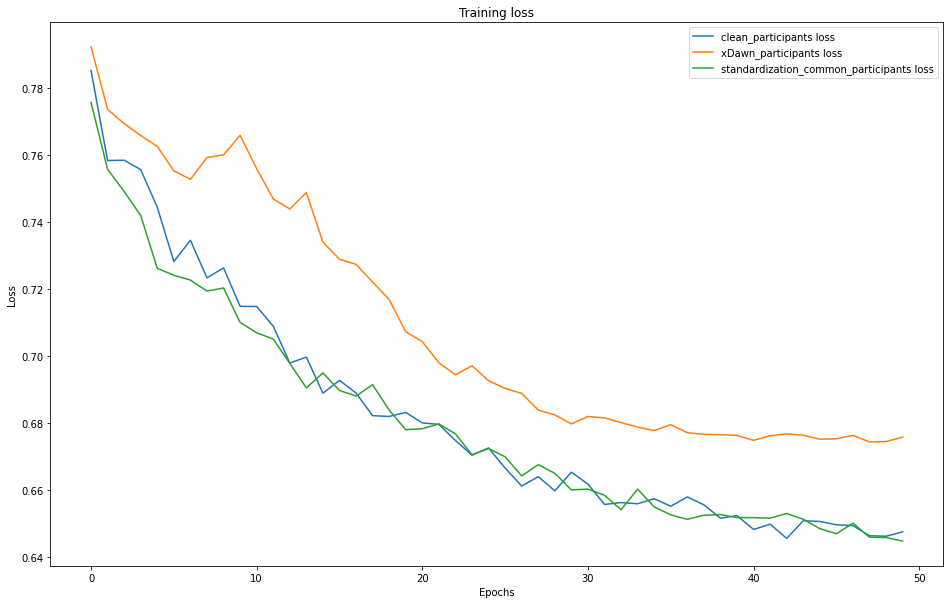

In [50]:
models_2 = ['clean_participants', 'xDawn_participants', 'standardization_common_participants']
plot_all(models_2)

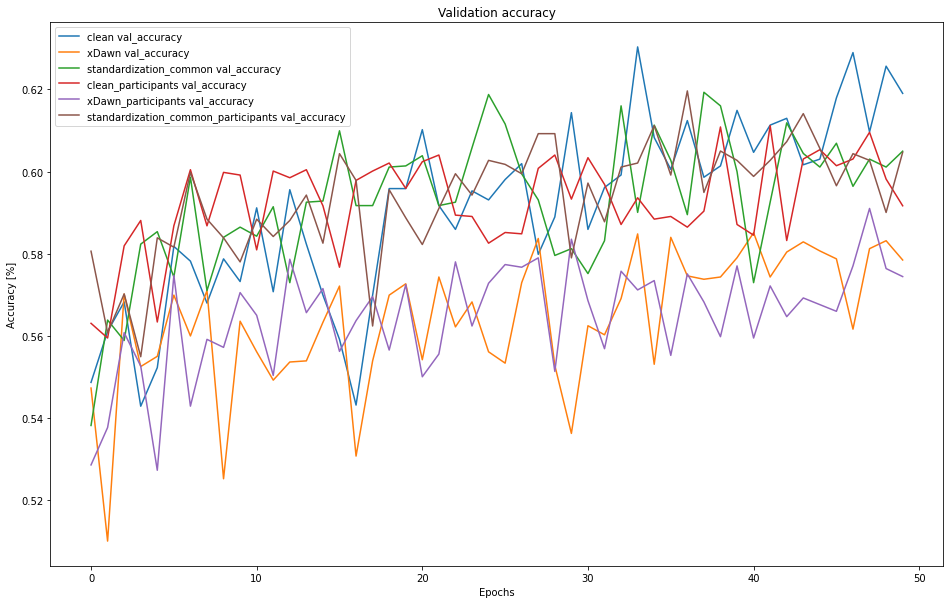

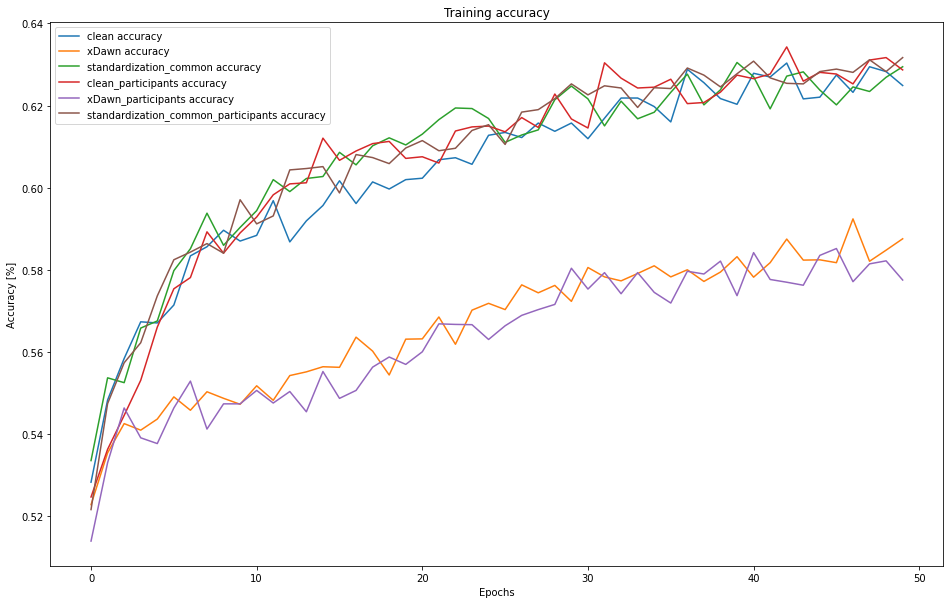

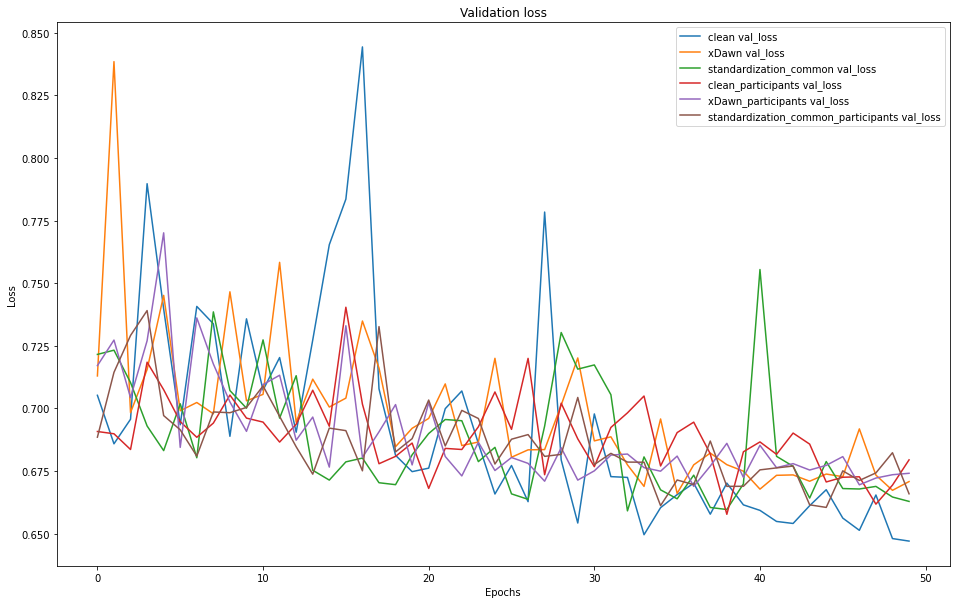

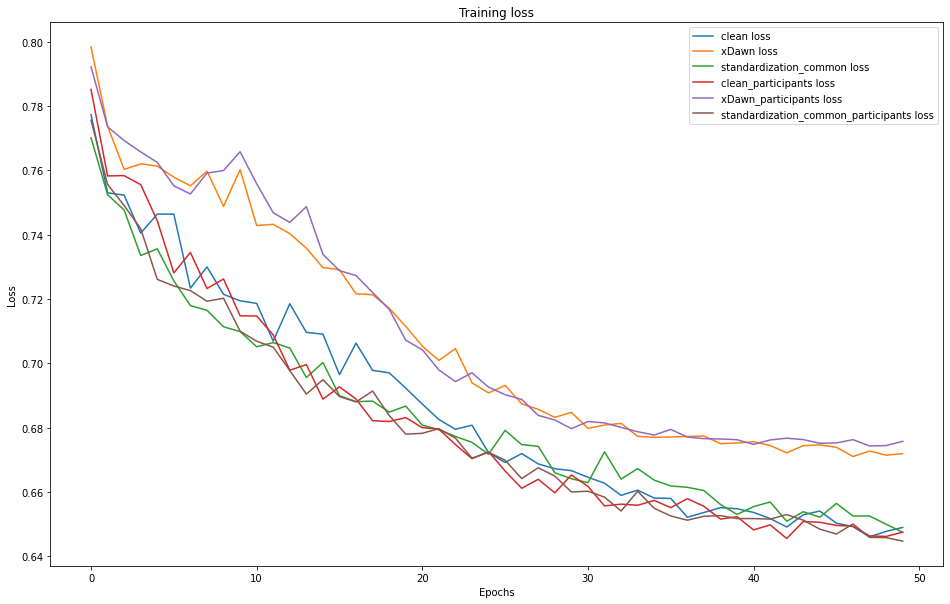

In [51]:
plot_all(models_1+models_2)

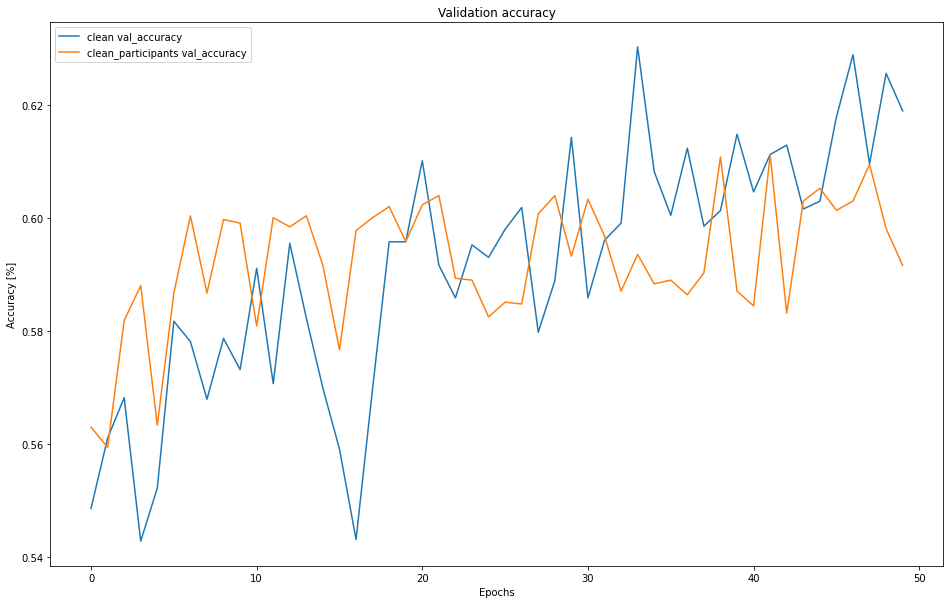

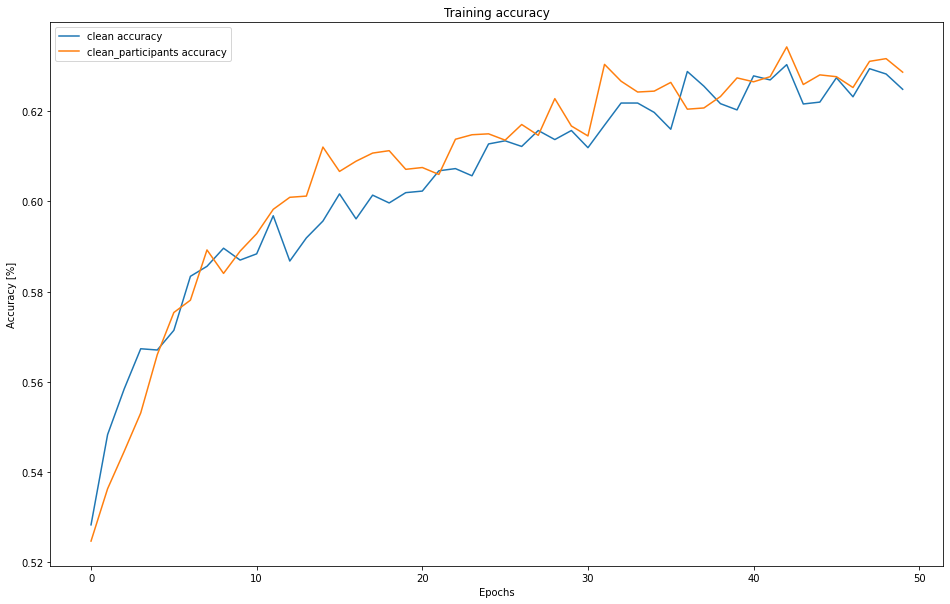

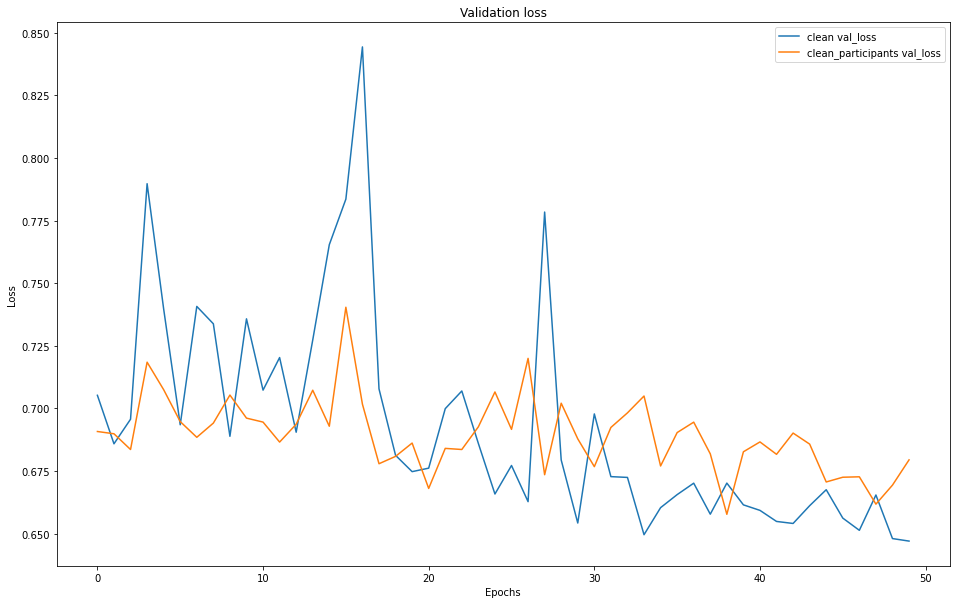

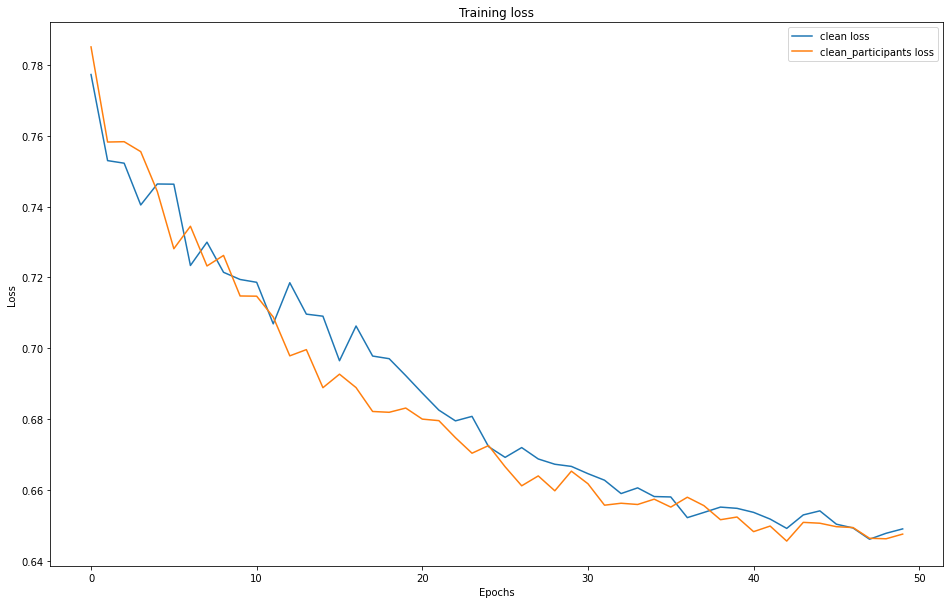

In [52]:
plot_all(['clean', 'clean_participants'])

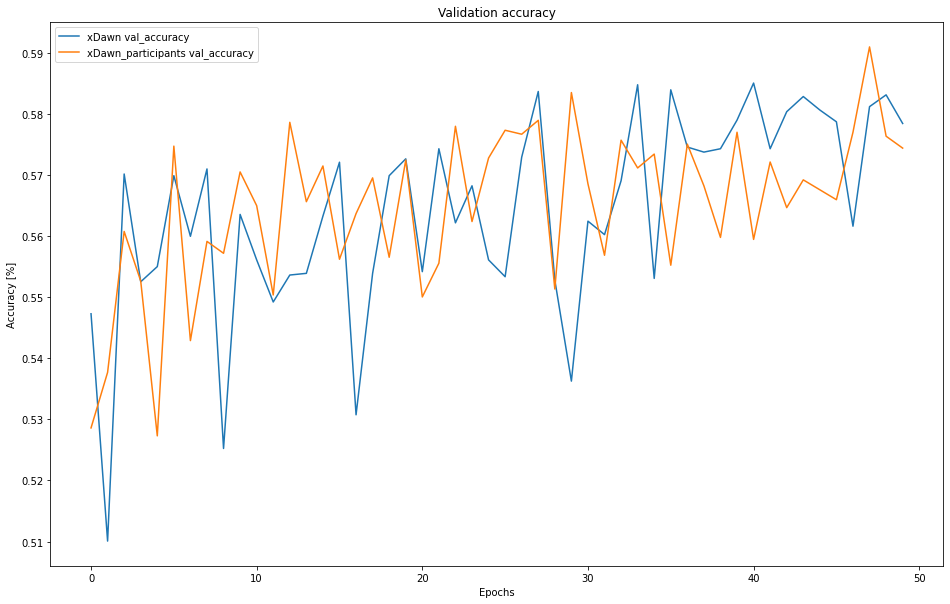

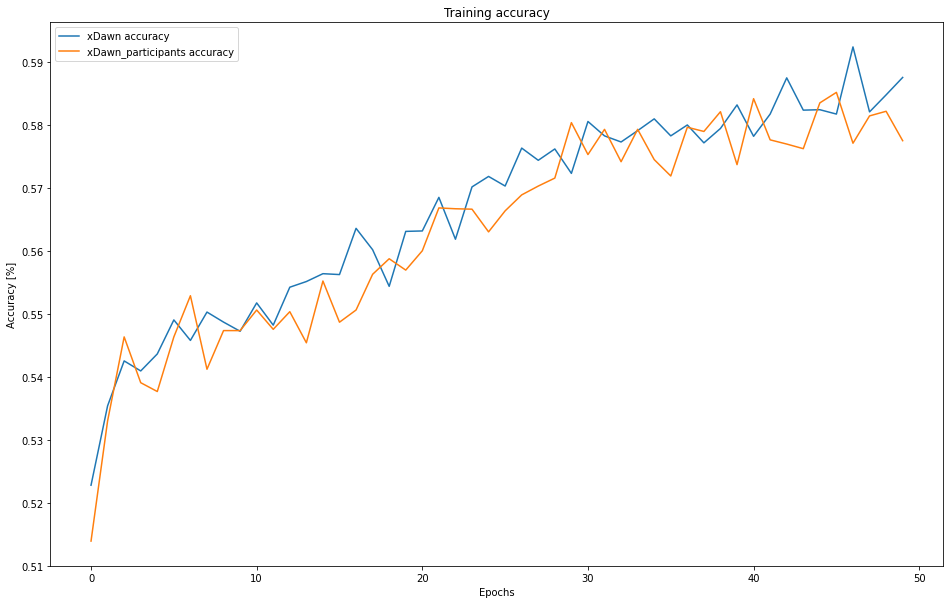

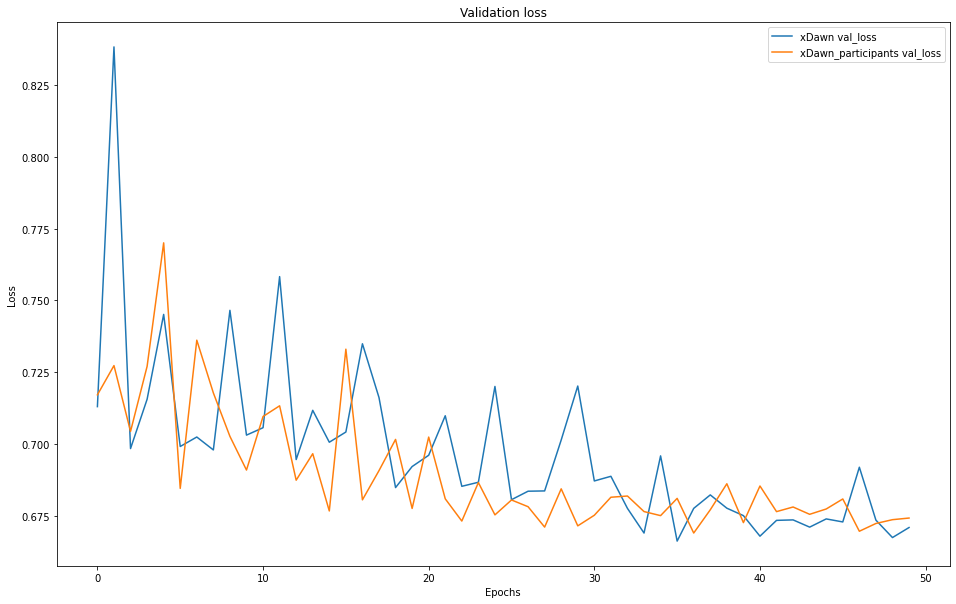

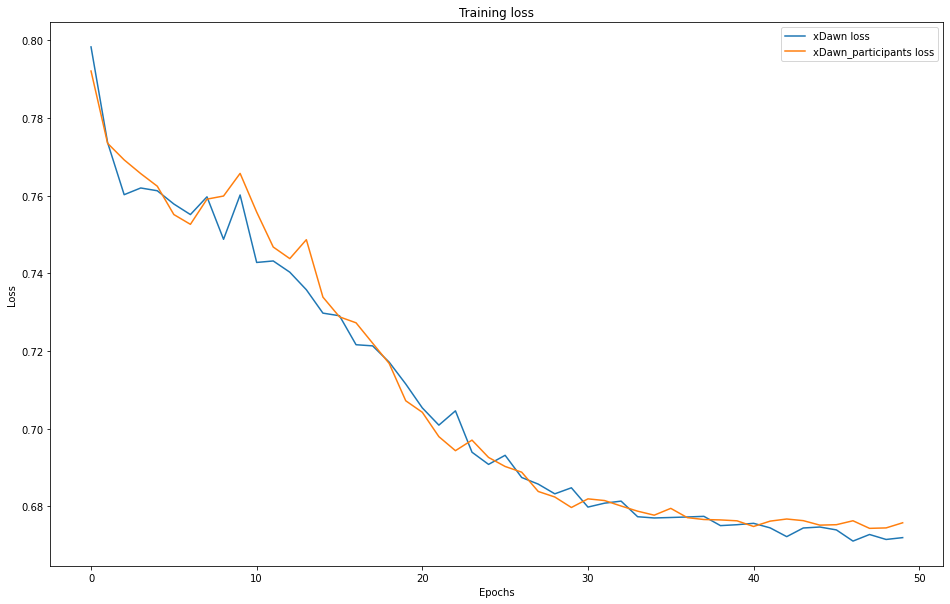

In [53]:
plot_all(['xDawn', 'xDawn_participants'])

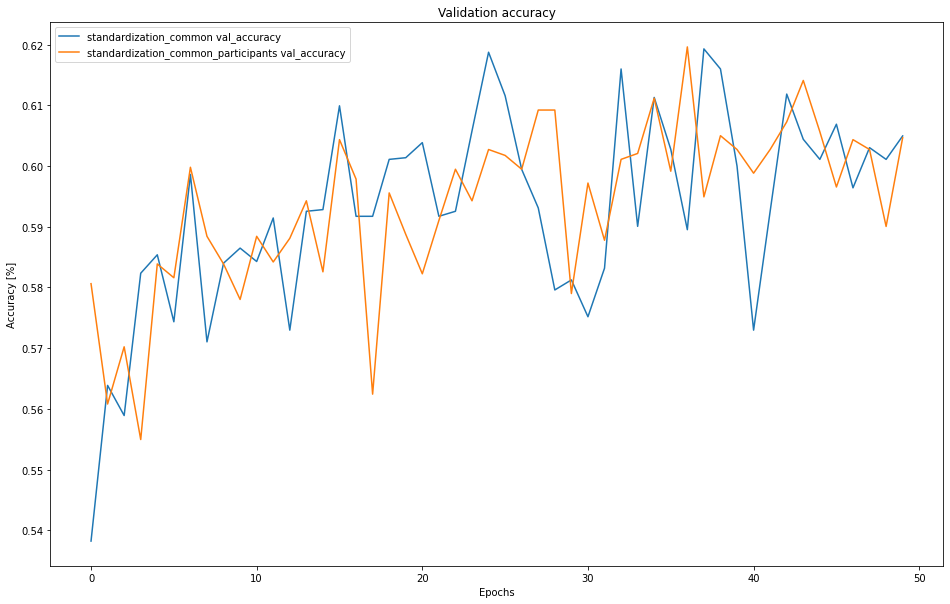

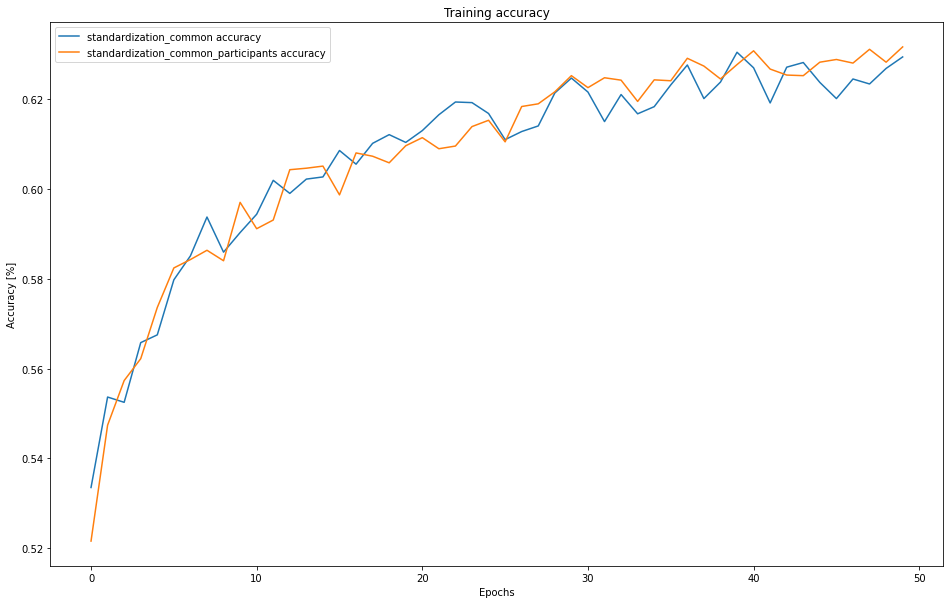

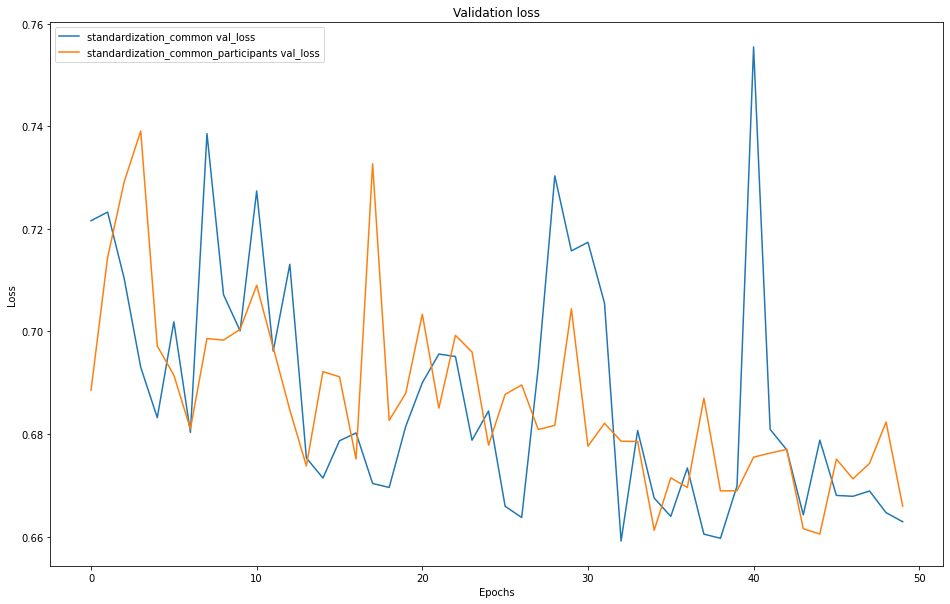

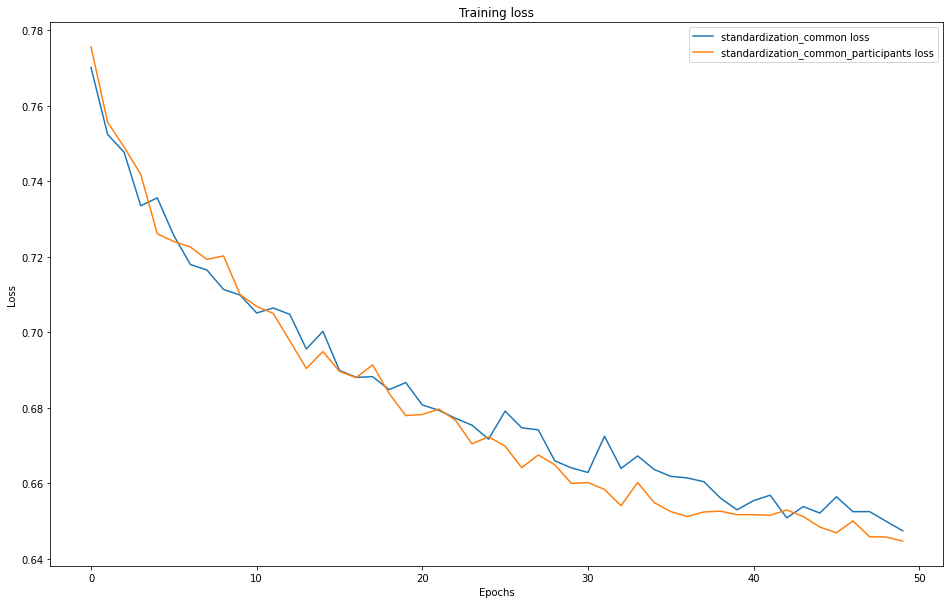

In [54]:
plot_all(['standardization_common', 'standardization_common_participants'])